## Content
I. Environment setup

II. Data preparation
  1. Data loading
  2. Data preprocessing
  
      2.1. Drop duplicated lines

      2.2. Encoding categorical columns

      2.3. Train/Test splitting

III. Training machine learning models by 5-fold cross-validation method
  1. Logistic Regression
  2. Support Vector Machine
  3. Random Forest
  4. Gradient Boosting Classifier 

IV. Conclusion


# I. Environment setup

In [ ]:
# # Connect with  my drive
# from google.colab import drive
# drive.mount('/content/drive/')
# import os
# os.chdir('/content/drive/MyDrive/A_projects/Credit_scoring/')

In [ ]:
!pip install catboost

In [ ]:
import os

In [ ]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = None 
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.pipeline import Pipeline
from matplotlib import pyplot
#from numpy import where
#from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
#from xgboost import XGBClassifier
#from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
#from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, accuracy_score, auc, roc_curve
#from sklearn.metrics import confusion_matrix, classification_report
#from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, roc_curve, auc
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE
#from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
#from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# II. Data preparation

## 1. Data loading

In [ ]:
# # Read data from my drive
# import os
# loan = pd.read_csv('Data/loan_fn.csv')
# #loan.head(2)

loan = pd.read_csv('loan_fn.csv')
loan

CUSTOMERID     CUSTOMER_TYPE  CATEGORYID   
0     1256754.000   Single Customer    1067.000  \
1     1617517.000   Single Customer    1067.000   
2     1308040.000   Single Customer    1067.000   
3     1384971.000   Single Customer    1067.000   
4     1660930.000   Single Customer    1067.000   
...           ...               ...         ...   
14531 1630937.000   Single Customer    1072.000   
14532 1720019.000   Single Customer    1083.000   
14533  109235.000   Single Customer    1072.000   
14534  484339.000   Single Customer    1072.000   
14535  178381.000  Customer linkage    1083.000   

                                     CATNAME            CRD_PURPOSE   
0      Hire Purchase (Upfront Method) Int 7%  Electronic Equipments  \
1      Hire Purchase (Upfront Method) Int 7%  Electronic Equipments   
2      Hire Purchase (Upfront Method) Int 7%  Electronic Equipments   
3      Hire Purchase (Upfront Method) Int 7%  Electronic Equipments   
4      Hire Purchase (Upfront Method) Int 7%  Electronic Equipments   
...                                      ...                    ...   
14531   Hire Purchase (Amortization) Int 10%          Motor Vehicle   
14532   Hire Purchase (Amortization) Int 10%          Motor Vehicle   
14533   Hire Purchase (Amortization) Int 10%          Motor Vehicle   
14534   Hire Purchase (Amortization) Int 10%          Motor Vehicle   
14535   Hire Purchase (Amortization) Int 10%          Motor Vehicle   

           CRD_CLASSIFICATION      CRLIMIT               BRNAME   
0      Agriculture/Livestocks   413700.000     0001-Nay Pyi Taw  \
1      Agriculture/Livestocks   595000.000     0001-Nay Pyi Taw   
2      Agriculture/Livestocks   560000.000     0001-Nay Pyi Taw   
3      Agriculture/Livestocks   559300.000     0001-Nay Pyi Taw   
4      Agriculture/Livestocks   707000.000     0001-Nay Pyi Taw   
...                       ...          ...                  ...   
14531  Agriculture/Livestocks 34170813.780  0254-YGN(108)_158ST   
14532  Agriculture/Livestocks 43360000.000   0258-YGN(110)_HLG3   
14533  Agriculture/Livestocks  4852320.000    0262-YGN(111)_MTR   
14534  Agriculture/Livestocks 11448000.000    0262-YGN(111)_MTR   
14535  Agriculture/Livestocks 23600000.000    0264-YGN(112)-SDP   

                      DEALER_NAME   PRINTAMT  Down_payment%   
0                  Wellcom Mobile 137840.130         30.000  \
1                  Wellcom Mobile 198289.800         30.000   
2                  Wellcom Mobile 186437.350         30.000   
3                  Wellcom Mobile 202874.530         30.000   
4                  Wellcom Mobile 256884.950         30.000   
...                           ...        ...            ...   
14531  Pacific Alpine Myanmar Ltd      0.000          0.000   
14532      Capital  Motor Co.,Ltd      0.000         20.000   
14533        TTAS Co.,Ltd(Toyota) 555021.440         80.000   
14534        TTAS Co.,Ltd(Toyota) 447214.680         60.000   
14535    Myo Motor Service Co.Ltd 921931.030         20.000   

       ntransaction_l12m MARTIAL_STATUS  nopen_account  nclose_account  state   
0                  7.000        Unknown          1.000           0.000      5  \
1                  7.000         Single          1.000           0.000     13   
2                  7.000         Single          1.000           0.000     12   
3                  7.000         Single          1.000           0.000      9   
4                  7.000         Single          1.000           0.000     12   
...                  ...            ...            ...             ...    ...   
14531             12.000         Single          1.000           2.000     12   
14532              2.000        Unknown          1.000           0.000     12   
14533              1.000        Unknown          1.000           0.000     12   
14534              1.000        Unknown          1.000           0.000     12   
14535              3.000        Unknown          1.000           1.000      9   

      

In [ ]:
loan.columns

Index(['CUSTOMERID', 'CUSTOMER_TYPE', 'CATEGORYID', 'CATNAME', 'CRD_PURPOSE',
       'CRD_CLASSIFICATION', 'CRLIMIT', 'BRNAME', 'DEALER_NAME', 'PRINTAMT',
       'Down_payment%', 'ntransaction_l12m', 'MARTIAL_STATUS', 'nopen_account',
       'nclose_account', 'state', 'Age', 'good_bad', 'Duration'],
      dtype='object')

In [ ]:
loan.shape

(14536, 19)

## 2. Data preprocessing

**2.1. Drop duplicated rows**

In [ ]:
# Check if there exist duplicated lines
#loan[loan.duplicated()]

In [ ]:
loan = loan.drop_duplicates()

In [ ]:
# # Check missing values
# loan.isna().sum()

# # filling missing value in each group 
# loan_0 = loan[loan['good_bad'] == 0]
# loan_1 = loan[loan['good_bad'] == 1]


In [ ]:
# np.mean(loan_0['ntransaction_l12m'])

**2.2. Check missing values**

In [ ]:
# # Check missing values
# loan.isna().sum()

# # filling missing value in each group 
# loan_0 = loan[loan['good_bad'] == 0]
# loan_1 = loan[loan['good_bad'] == 1]

# loan_0.loc[:,'ntransaction_l12m'] = loan_0['ntransaction_l12m'].fillna(np.round(np.mean(loan_0['ntransaction_l12m'])))
# loan_1.loc[:,'ntransaction_l12m'] = loan_1['ntransaction_l12m'].fillna(np.round(np.mean(loan_1['ntransaction_l12m'])))

# loan = pd.concat([loan_0, loan_1], axis = 0)

Remove the CATNAME because the CATEGORYID field is the encoding of each loan type

In [ ]:
loan.drop(['CATNAME'], axis=1, inplace=True)

C:\Users\anh.nguyenthe\AppData\Local\Temp\ipykernel_5252\1576494835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan.drop(['CATNAME'], axis=1, inplace=True)


**2.3. Encoding all the categocical columns**

In [ ]:
# filter categorical data fields
categorical_cols = loan.select_dtypes(include=['object']).columns.to_list()

# display a list of categorical data fields
print('Categorical columns: ', categorical_cols)

# Apply LabelEncoder to each column of type categorical
for col in categorical_cols:
    new_col_name = col + '_label'
    le = LabelEncoder()
    loan[new_col_name] = le.fit_transform(loan[col])

# Display data after applying LabelEncoder
#loan.head()

# delete categorical columms
loan = loan.drop(categorical_cols, axis=1)

Categorical columns:  ['CUSTOMER_TYPE', 'CRD_PURPOSE', 'CRD_CLASSIFICATION', 'BRNAME', 'DEALER_NAME', 'MARTIAL_STATUS']


C:\Users\anh.nguyenthe\AppData\Local\Temp\ipykernel_5252\4158236482.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan[new_col_name] = le.fit_transform(loan[col])
C:\Users\anh.nguyenthe\AppData\Local\Temp\ipykernel_5252\4158236482.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan[new_col_name] = le.fit_transform(loan[col])
C:\Users\anh.nguyenthe\AppData\Local\Temp\ipykernel_5252\4158236482.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

**2.4. Train/Test splitting**

In [ ]:
#Divide the data into two small sets of bad debt and good debt
bad_loans = loan[loan['good_bad'] == 0].copy()
good_loans = loan[loan['good_bad'] == 1].copy()

In [ ]:
# Split data
X_good = good_loans.drop(['good_bad']  , axis = 1)
y_good = good_loans['good_bad']

X_bad = bad_loans.drop(['good_bad']  , axis = 1)
y_bad = bad_loans['good_bad']

x_train_g , x_test_g , y_train_g , y_test_g = train_test_split( X_good, y_good , test_size = 0.2 , random_state = 42)
x_train_b , x_test_b , y_train_b , y_test_b = train_test_split(X_bad , y_bad , test_size = 0.2 , random_state = 42)

# Merge data training
X_train = pd.concat([x_train_g,x_train_b])
y_train = pd.concat([y_train_g,y_train_b])

# Merge data testing 
X_test = pd.concat([x_test_g,x_test_b])
y_test = pd.concat([y_test_g,y_test_b])

A = {'X_test': X_test,
     'y_test': y_test}
np.save('Result/test.npy', A)

In [ ]:
# split the data into 5 folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# from 5 folds are divided, choose 4 folds as training set and 1 fold as test set
for train_index, val_index in skf.split(X_train, y_train):
    X_train_, X_val_ = X_train.iloc[train_index,:], X_train.iloc[val_index,:]
    y_train_, y_val_ = y_train.iloc[train_index], y_train.iloc[val_index]
    print(y_train_.value_counts())
    print(y_val_.value_counts())

good_bad
1    5099
0    4185
Name: count, dtype: int64
good_bad
1    1275
0    1046
Name: count, dtype: int64
good_bad
1    5099
0    4185
Name: count, dtype: int64
good_bad
1    1275
0    1046
Name: count, dtype: int64
good_bad
1    5099
0    4185
Name: count, dtype: int64
good_bad
1    1275
0    1046
Name: count, dtype: int64
good_bad
1    5099
0    4185
Name: count, dtype: int64
good_bad
1    1275
0    1046
Name: count, dtype: int64
good_bad
1    5100
0    4184
Name: count, dtype: int64
good_bad
1    1274
0    1047
Name: count, dtype: int64


# III. Training machine learning models by 5-fold cross-validation technique

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import pyplot

def _plot_roc_curve(fpr, tpr, thres, auc):
    plt.figure(figsize = (10, 8))
    plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
    plt.plot([0, 1], [0, 1], '--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.title('ROC Curve')

def compute_scores(y_true, y_pred, show = None):
    b_acc = np.round(balanced_accuracy_score(y_true, y_pred)*100, 2)

    # Determine True Negative (TN), True Positive (TP), Faux Negative (FN), Faux Positive (FP) 
    TN, FP, FN, TP = confusion_matrix(y_true, y_pred).ravel()

    # Specificity 
    spe = np.round(TN/(TN + FP)*100, 2) 
    # Sensitivity
    sen = np.round(TP/(TP + FN)*100, 2)

    return b_acc, spe, sen

def training_GS(model, params, model_name, X_train, y_train, X_test, y_test, rst_path, print_scores = None, plot_ROC = None):
    model_path = rst_path + model_name + '/'
    os.mkdir(model_path)

    B_acc = []
    Spe = []
    Sen = []
    Best_params = {}
    Feature_importance = {}
    
    X_train = X_train.drop(columns = ['CUSTOMERID'], axis = 1)
    ID_test = list(X_test['CUSTOMERID'])
    X_test = X_test.drop(columns = ['CUSTOMERID'], axis = 1)

    X_test = np.array(X_test)
    y_test = np.array(y_test)

    # create a dataframe to save the test results
    df_test = pd.DataFrame()
    df_test['ID_test'] = ID_test
    df_test['y_test'] = y_test

    i = 0
    for train_index, val_index in skf.split(X_train, y_train):
        i = i + 1 
        print('Fold_' + str(i))
        # Choose 4 sets as training set and 1 set as validation set
        X_train_, X_val_ = X_train.iloc[train_index,:], X_train.iloc[val_index,:]
        y_train_, y_val_ = y_train.iloc[train_index], y_train.iloc[val_index]

        X_train_ = np.array(X_train_)
        y_train_ = np.array(y_train_)
        X_val_ = np.array(X_val_)
        y_val_ = np.array(y_val_)
        
        # Normalization training/validation/test sets
        scaler = StandardScaler()
        X_train_scaler = scaler.fit_transform(X_train_)
        X_val_scaler = scaler.transform(X_val_)
        X_test_scaler = scaler.transform(X_test)

        # Balancing the training set
        ros = RandomOverSampler(random_state = 42)
        X_train_rs, y_train_rs = ros.fit_resample(X_train_scaler, y_train_)

        if model_name == 'SVM':
          grid_model = SVC(probability = True)
        else:
          grid_model = model()
        grid_search = GridSearchCV(estimator = grid_model,
                                  param_grid = params,
                                  verbose = 0)
        
        grid_search.fit(X_train_rs, y_train_rs)
        best_train_score = grid_search.best_score_
        best_params = grid_search.best_params_
        best_model = grid_search.best_estimator_
        Best_params['fold_' + str(i)] = best_params
        Feature_importance['fold_' + str(i)] = {}
        # get importance
        importance = best_model.coef_[0]
        # summarize feature importance
        for j,v in enumerate(importance):
        #print('Feature: %0d, Score: %.5f' % (i,v))
          Feature_importance['fold_' + str(i)]['Feature'+ str(j+1)] = v
        # all scores on val set
        y_val_pred = grid_search.predict(X_val_scaler)
        b_acc, spe, sen = compute_scores(y_val_, y_val_pred)
        B_acc.append(b_acc)
        Spe.append(spe)
        Sen.append(sen)

        # Prediction of the i^th sub-model on the test set
        proba_test_pred = grid_search.predict_proba(X_test_scaler)
        # save the probability that observations belonging to the positive class
        df_test['proba_' + str(i)] = proba_test_pred[:,1]

        # plot roc curve
        if plot_ROC:
          fpr, tpr, thres = roc_curve(y_test, proba_test_pred[:,1])
          roc_auc = auc(fpr, tpr)
          _plot_roc_curve(fpr, tpr, thres, roc_auc)

    # Update scores on the validation set
    Scores_val = {}
    Scores_val['B_acc'] = B_acc
    Scores_val['Spe'] = Spe
    Scores_val['Sen'] = Sen

    # Evaluate the customer credit scores based on the predicted probability values
    ind_1 = df_test.columns.get_loc('proba_1')
    df_test['proba_sum'] = df_test.iloc[:,ind_1:(ind_1+5)].sum(axis = 1)
    df_test['proba'] = df_test['proba_sum']/5 
    df_test['y_pred'] = df_test['proba'].apply(lambda x: 1 if x >= 0.5 else 0)
    b_acc, spe, sen = compute_scores(df_test['y_test'], df_test['y_pred'])
    Scores_test = {}
    Scores_test['B_acc'] = b_acc
    Scores_test['Spe'] = spe
    Scores_test['Sen'] = sen

    if print_scores:
      print('Validation: ')
      print('B_acc: ', np.round(np.mean(Scores_val['B_acc']),1), '----------- std: ', np.round(np.std(Scores_val['B_acc']), 1))
      print('Spe: ', np.round(np.mean(Scores_val['Spe']),1), '----------- std: ', np.round(np.std(Scores_val['Spe']), 1)) 
      print('Sen: ', np.round(np.mean(Scores_val['Sen']),1), '----------- std: ', np.round(np.std(Scores_val['Sen']), 1)) 

      print('Test: ')
      print('B_acc: ', np.round(np.mean(Scores_test['B_acc']),1))
      print('Spe: ', np.round(np.mean(Scores_test['Spe']),1)) 
      print('Sen: ', np.round(np.mean(Scores_test['Sen']),1)) 

    # Save the results 
    Results = {}
    Results['Scores_val'] = Scores_val
    Results['Scores_test'] = Scores_test
    Results['df_test'] = df_test
    Results['Best_params'] = Best_params
    Results['Feature_importance'] = Feature_importance 
    np.save(model_path + 'Results.npy', Results)
    return Scores_val, Scores_test, df_test
    

## 1. Logistic Regression

In [ ]:
rst_path_ = 'Result_Grid/'
if not os.path.exists(rst_path_):
    os.makedirs(rst_path_)

Fold_1


C:\Users\anh.nguyenthe\AppData\Local\Temp\ipykernel_5252\95133054.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
C:\Users\anh.nguyenthe\AppData\Local\Temp\ipykernel_5252\95133054.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


Fold_2


C:\Users\anh.nguyenthe\AppData\Local\Temp\ipykernel_5252\95133054.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
C:\Users\anh.nguyenthe\AppData\Local\Temp\ipykernel_5252\95133054.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


Fold_3


C:\Users\anh.nguyenthe\AppData\Local\Temp\ipykernel_5252\95133054.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
C:\Users\anh.nguyenthe\AppData\Local\Temp\ipykernel_5252\95133054.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


Fold_4


C:\Users\anh.nguyenthe\AppData\Local\Temp\ipykernel_5252\95133054.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
C:\Users\anh.nguyenthe\AppData\Local\Temp\ipykernel_5252\95133054.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


Fold_5


C:\Users\anh.nguyenthe\AppData\Local\Temp\ipykernel_5252\95133054.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
C:\Users\anh.nguyenthe\AppData\Local\Temp\ipykernel_5252\95133054.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


Validation: 
B_acc:  77.6 ----------- std:  1.0
Spe:  69.6 ----------- std:  1.7
Sen:  85.5 ----------- std:  0.8
Test: 
B_acc:  79.0
Spe:  71.0
Sen:  87.0


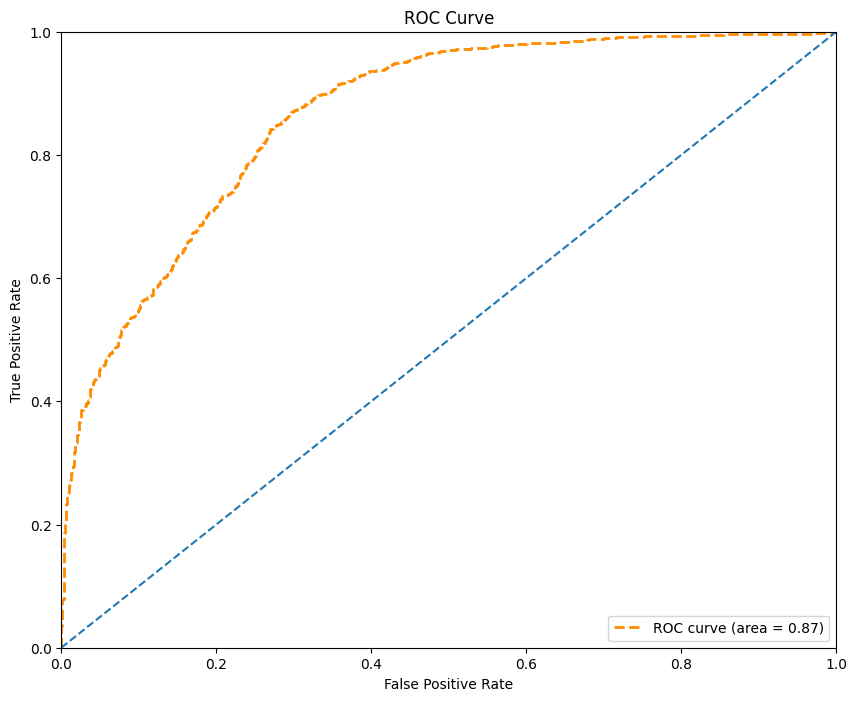

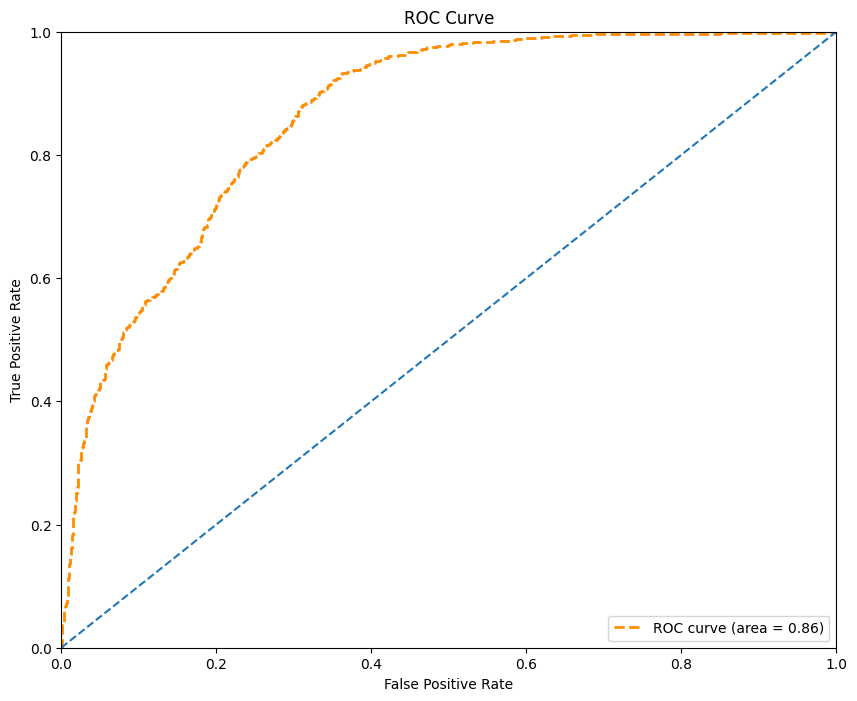

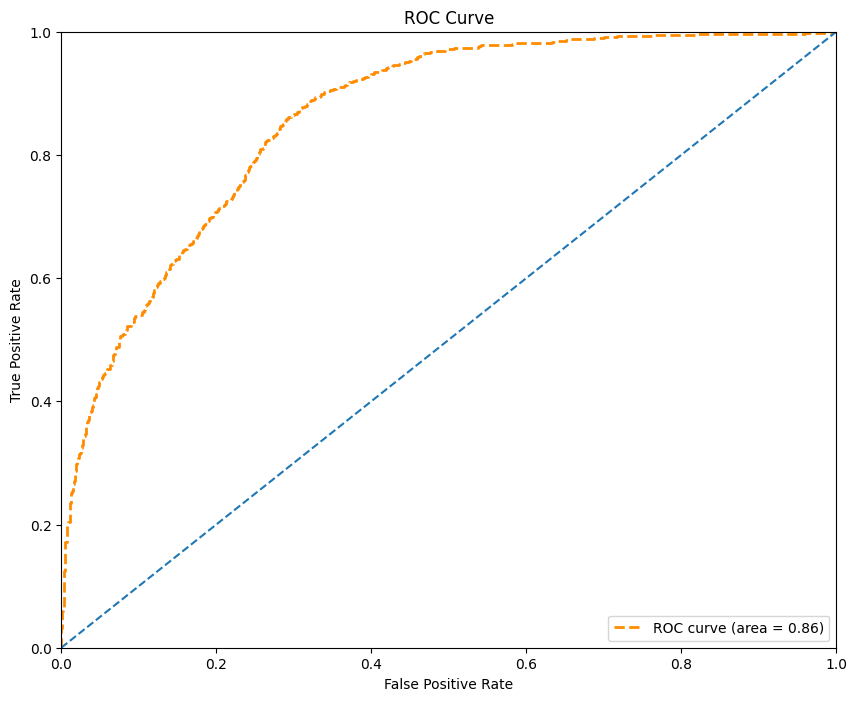

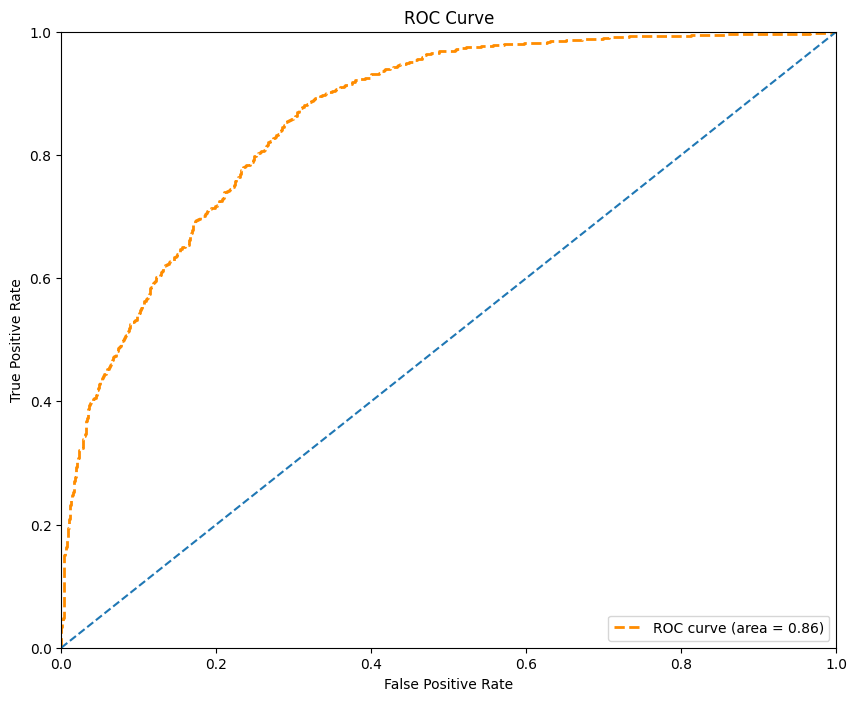

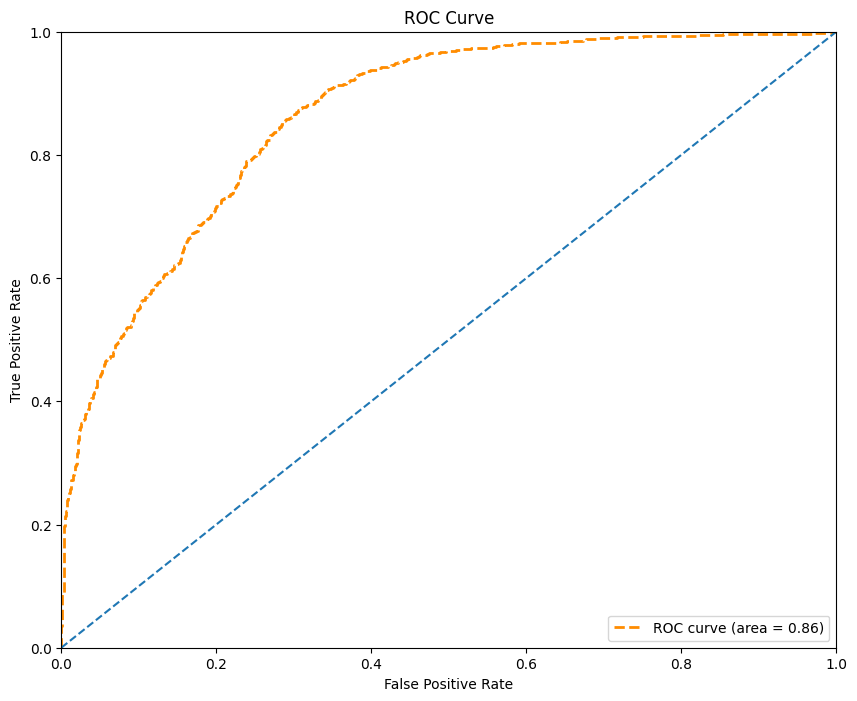

In [ ]:
LR_model = LogisticRegression
LR_params = {'penalty': ['l2'],
          'max_iter': [1000],
          'C': [100, 200, 300],
          'solver': ['lbfgs']}

Rst_LR = training_GS(LR_model, LR_params, model_name = 'LR', X_train = X_train, y_train = y_train, 
                    X_test = X_test, y_test = y_test, rst_path = rst_path_, print_scores = True, plot_ROC = True)


## 2. Support Vector Machine (SVM)

In [ ]:
rst_path_= 'Result_Grid/' 

Fold_1


<ipython-input-35-da6a9a44f67d>:4: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
<ipython-input-35-da6a9a44f67d>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


Fold_2


<ipython-input-35-da6a9a44f67d>:4: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
<ipython-input-35-da6a9a44f67d>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


Fold_3


<ipython-input-35-da6a9a44f67d>:4: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
<ipython-input-35-da6a9a44f67d>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


Fold_4


<ipython-input-35-da6a9a44f67d>:4: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
<ipython-input-35-da6a9a44f67d>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


Fold_5


<ipython-input-35-da6a9a44f67d>:4: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
<ipython-input-35-da6a9a44f67d>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


Validation: 
B_acc:  78.4 ----------- std:  0.9
Spe:  68.7 ----------- std:  2.0
Sen:  88.2 ----------- std:  0.6
Test: 
B_acc:  79.5
Spe:  68.5
Sen:  90.5


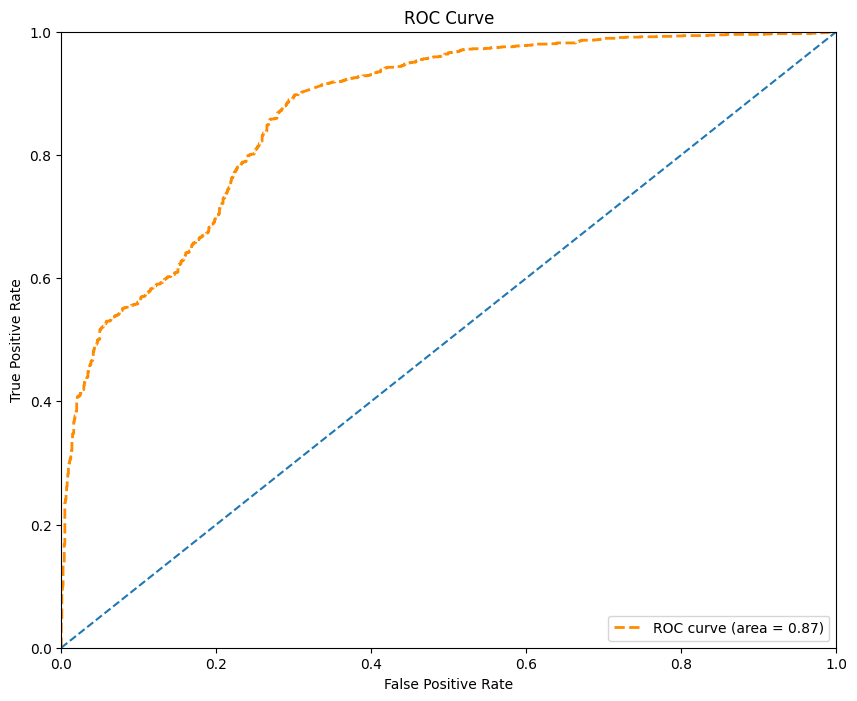

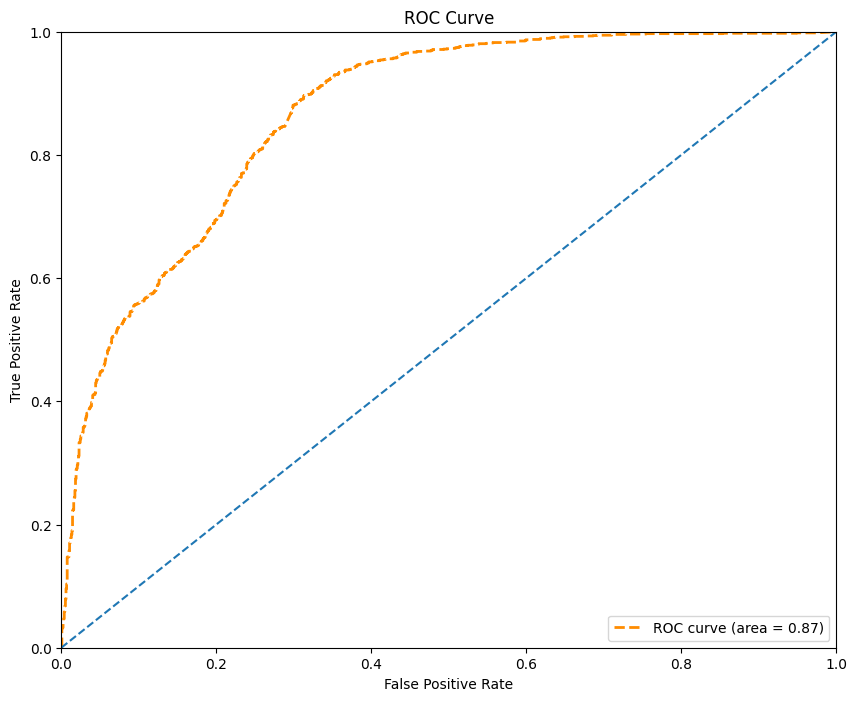

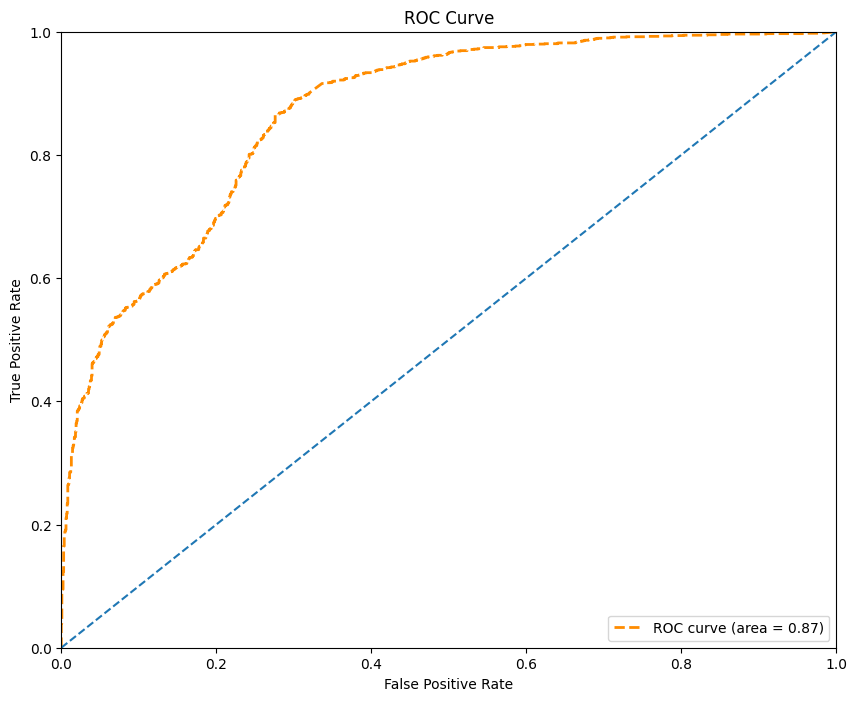

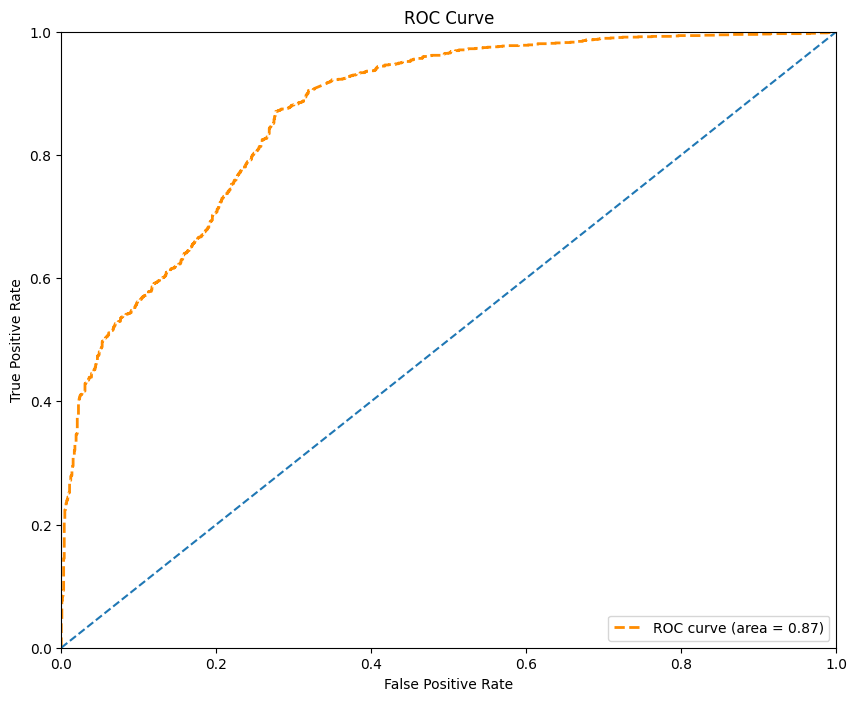

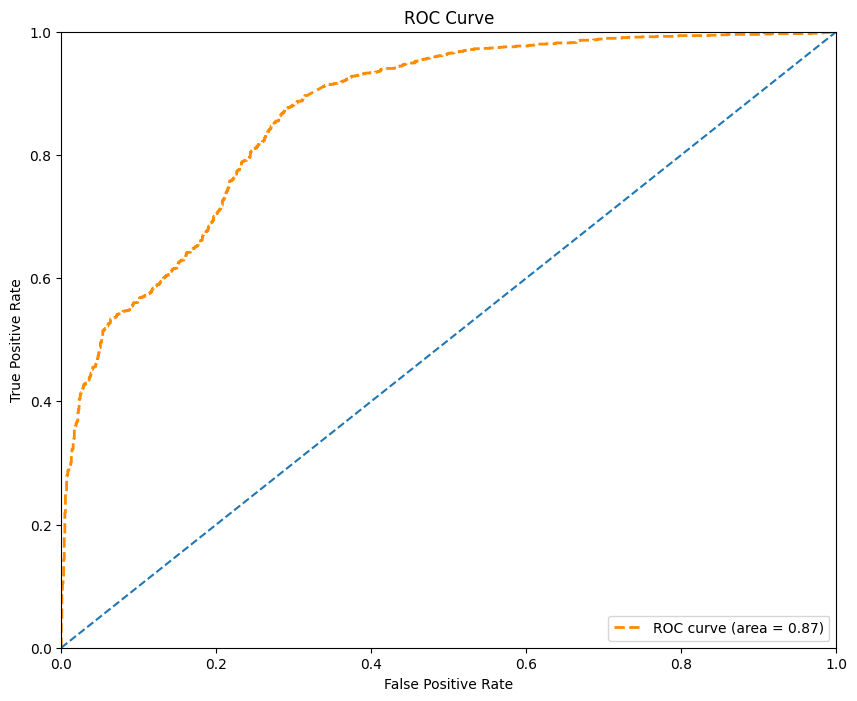

In [ ]:

svm_model = SVC
svm_params = [{'C': [100],
               'kernel': ['linear']}]
#svm_model = SVC(C= 1000, gamma= 3, kernel= 'rbf',probability=True)

Rst_SVM = training_GS(svm_model, svm_params, model_name = 'SVM', X_train = X_train, y_train = y_train, 
                      X_test = X_test, y_test = y_test, rst_path = '/content/', print_scores = True, plot_ROC = True)


## 3. Random Forest (RF)

In [ ]:
rst_path_= 'Result_Grid/'

Fold_1


C:\Users\anh.nguyenthe\AppData\Local\Temp\ipykernel_28000\266038395.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
C:\Users\anh.nguyenthe\AppData\Local\Temp\ipykernel_28000\266038395.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


Fold_2


C:\Users\anh.nguyenthe\AppData\Local\Temp\ipykernel_28000\266038395.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
C:\Users\anh.nguyenthe\AppData\Local\Temp\ipykernel_28000\266038395.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


Fold_3


C:\Users\anh.nguyenthe\AppData\Local\Temp\ipykernel_28000\266038395.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
C:\Users\anh.nguyenthe\AppData\Local\Temp\ipykernel_28000\266038395.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


Fold_4


C:\Users\anh.nguyenthe\AppData\Local\Temp\ipykernel_28000\266038395.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
C:\Users\anh.nguyenthe\AppData\Local\Temp\ipykernel_28000\266038395.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


Fold_5


C:\Users\anh.nguyenthe\AppData\Local\Temp\ipykernel_28000\266038395.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
C:\Users\anh.nguyenthe\AppData\Local\Temp\ipykernel_28000\266038395.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


Validation: 
B_acc:  84.4 ----------- std:  1.0
Spe:  81.0 ----------- std:  1.5
Sen:  87.9 ----------- std:  0.7
Test: 
B_acc:  85.6
Spe:  81.7
Sen:  89.5


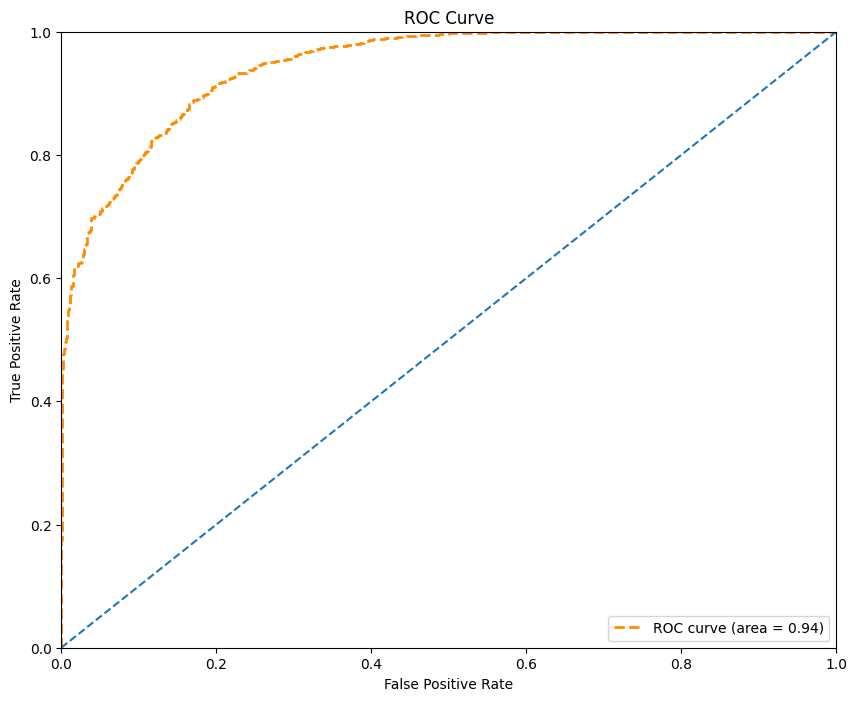

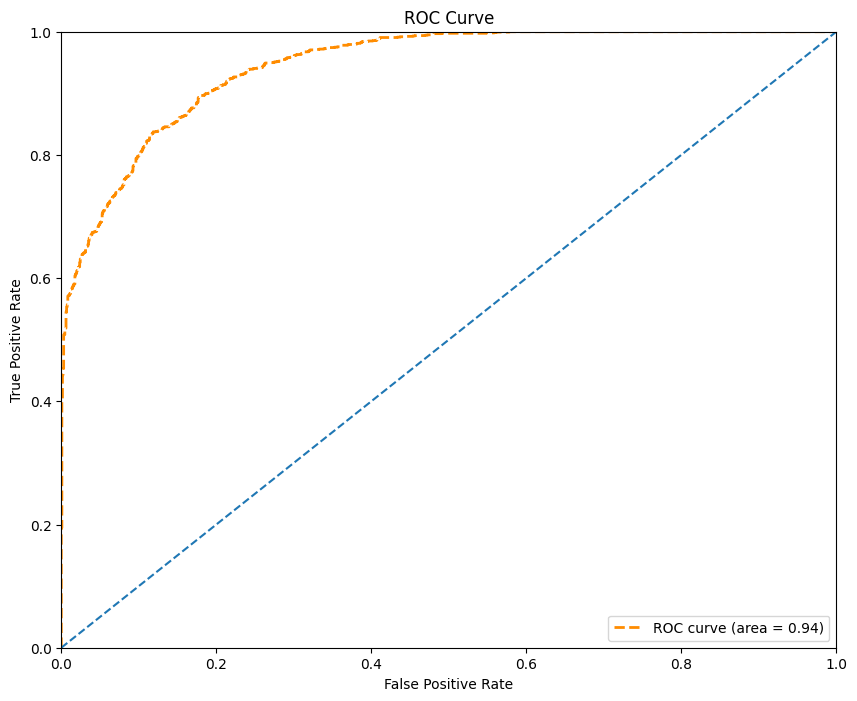

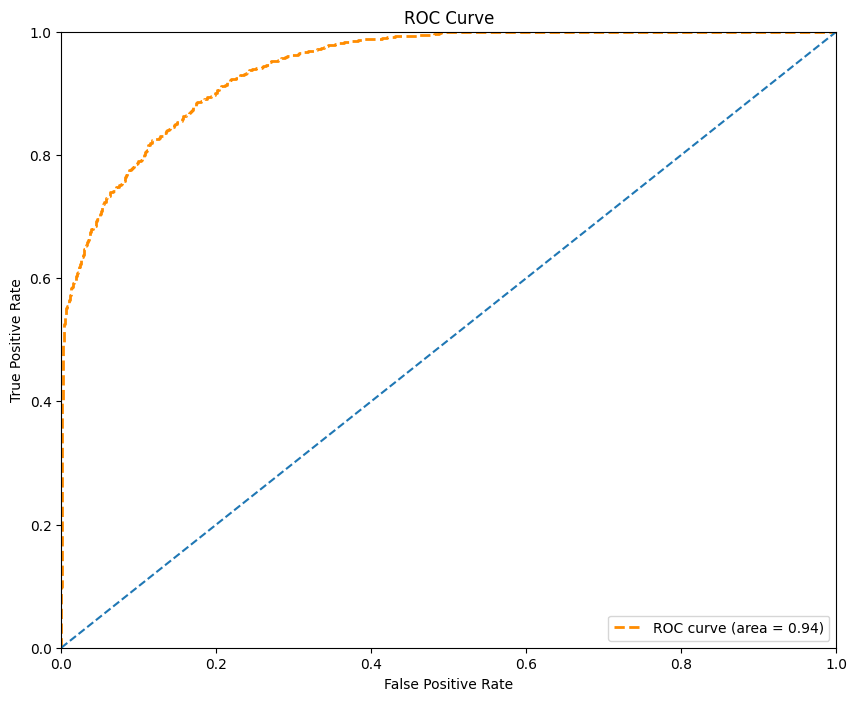

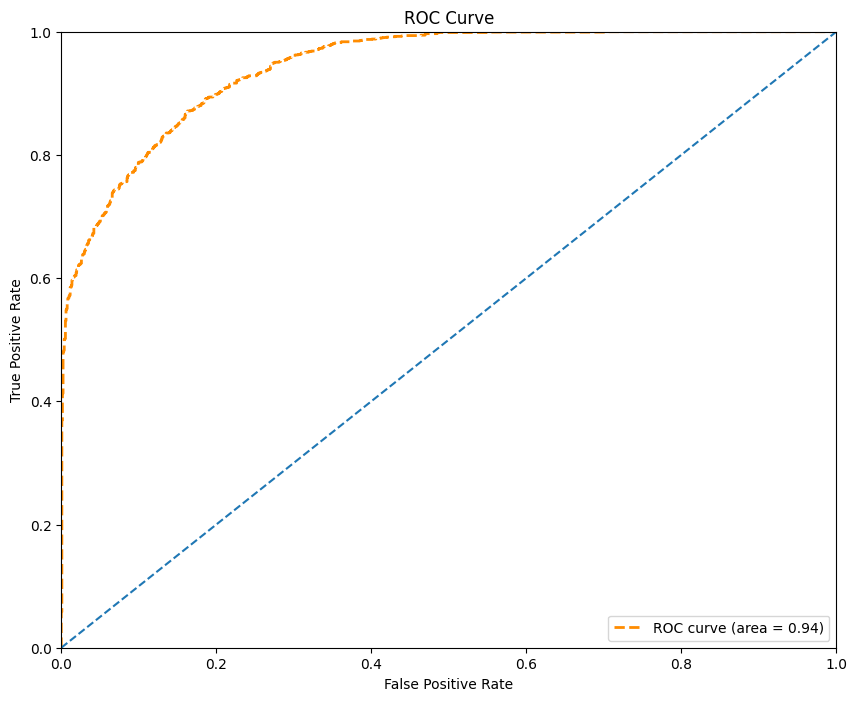

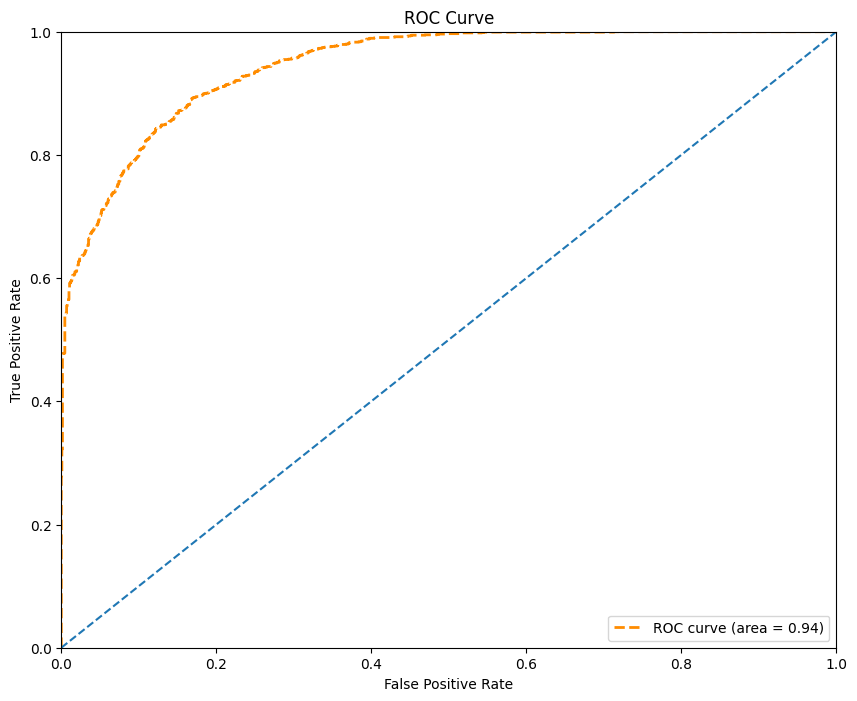

In [ ]:
RF_model = RandomForestClassifier
RF_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15]
}

Rst_RF = training_GS(RF_model, RF_params, model_name = 'RF', X_train = X_train, y_train = y_train, 
                      X_test = X_test, y_test = y_test, rst_path = rst_path_, print_scores = True, plot_ROC = True)

## 4. Gradient Boosting Classifier (GBC)

In [ ]:
rst_path_= 'Result_Grid/'

Fold_1


C:\Users\anh.nguyenthe\AppData\Local\Temp\ipykernel_26920\266038395.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
C:\Users\anh.nguyenthe\AppData\Local\Temp\ipykernel_26920\266038395.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


Fold_2


C:\Users\anh.nguyenthe\AppData\Local\Temp\ipykernel_26920\266038395.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
C:\Users\anh.nguyenthe\AppData\Local\Temp\ipykernel_26920\266038395.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


Fold_3


C:\Users\anh.nguyenthe\AppData\Local\Temp\ipykernel_26920\266038395.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
C:\Users\anh.nguyenthe\AppData\Local\Temp\ipykernel_26920\266038395.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


Fold_4


C:\Users\anh.nguyenthe\AppData\Local\Temp\ipykernel_26920\266038395.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
C:\Users\anh.nguyenthe\AppData\Local\Temp\ipykernel_26920\266038395.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


Fold_5


C:\Users\anh.nguyenthe\AppData\Local\Temp\ipykernel_26920\266038395.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
C:\Users\anh.nguyenthe\AppData\Local\Temp\ipykernel_26920\266038395.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


Validation: 
B_acc:  87.8 ----------- std:  1.1
Spe:  85.4 ----------- std:  1.1
Sen:  90.2 ----------- std:  1.1
Test: 
B_acc:  89.8
Spe:  88.1
Sen:  91.5


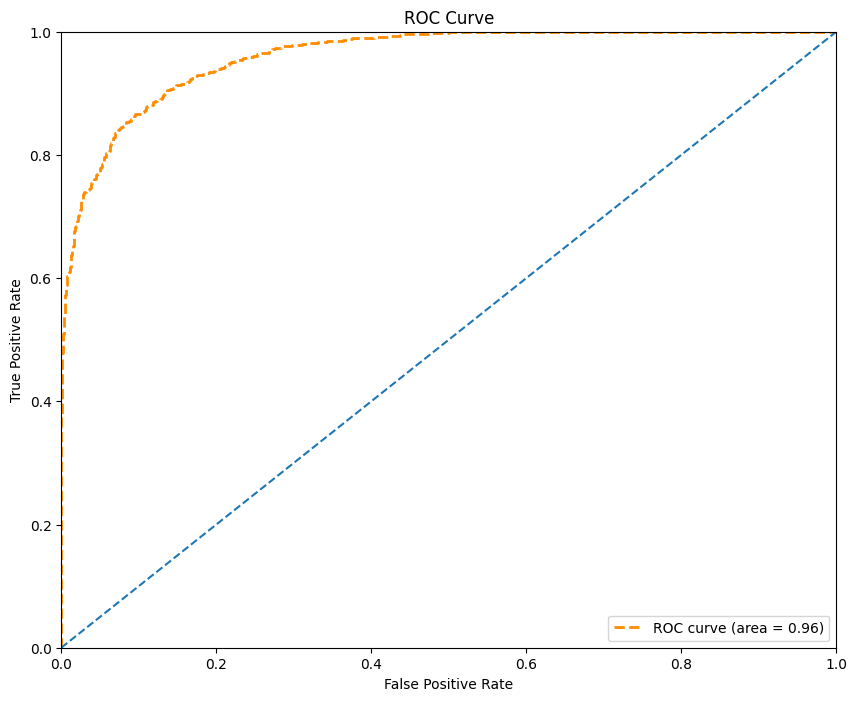

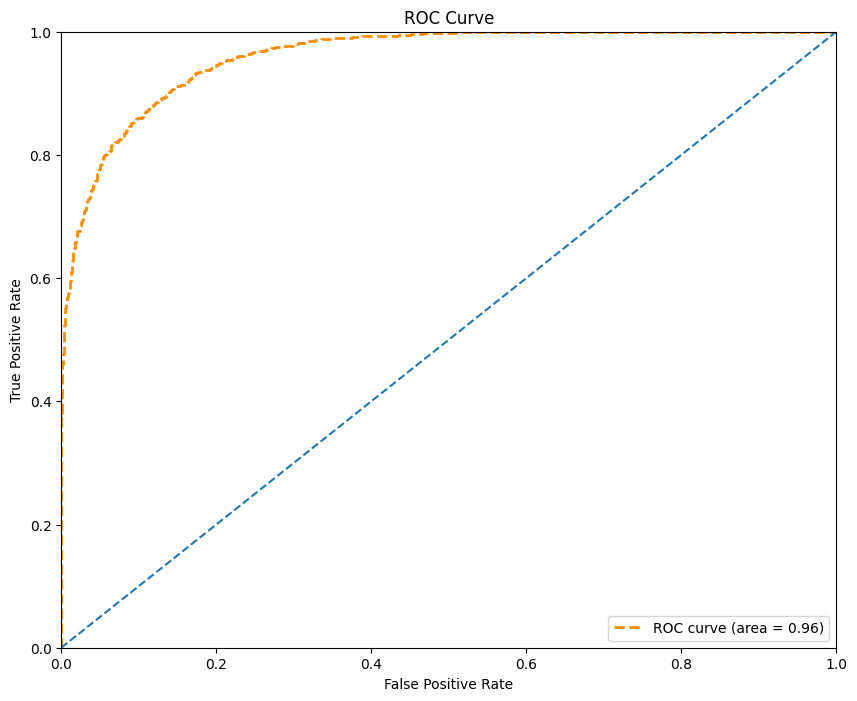

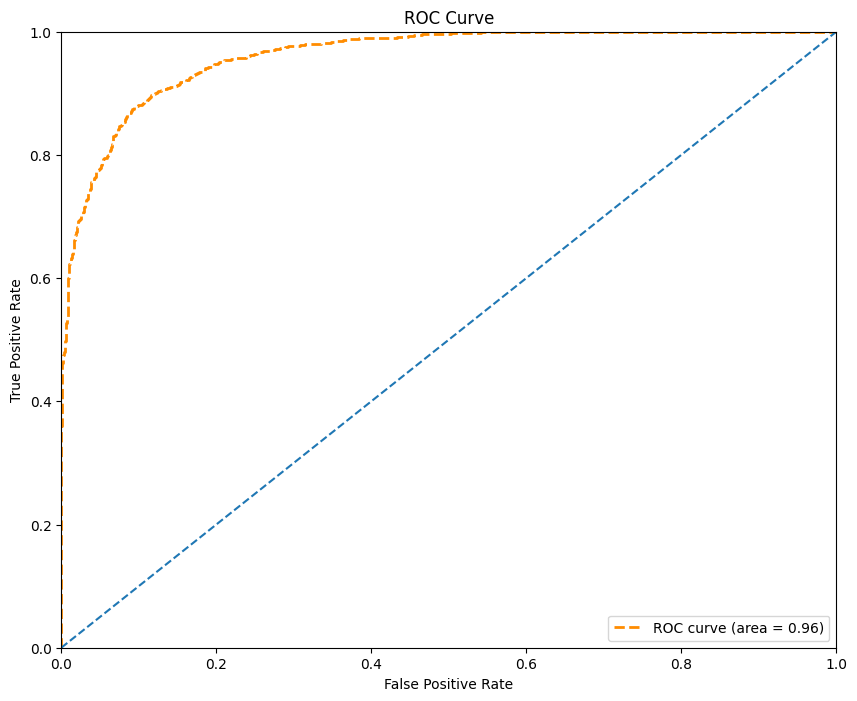

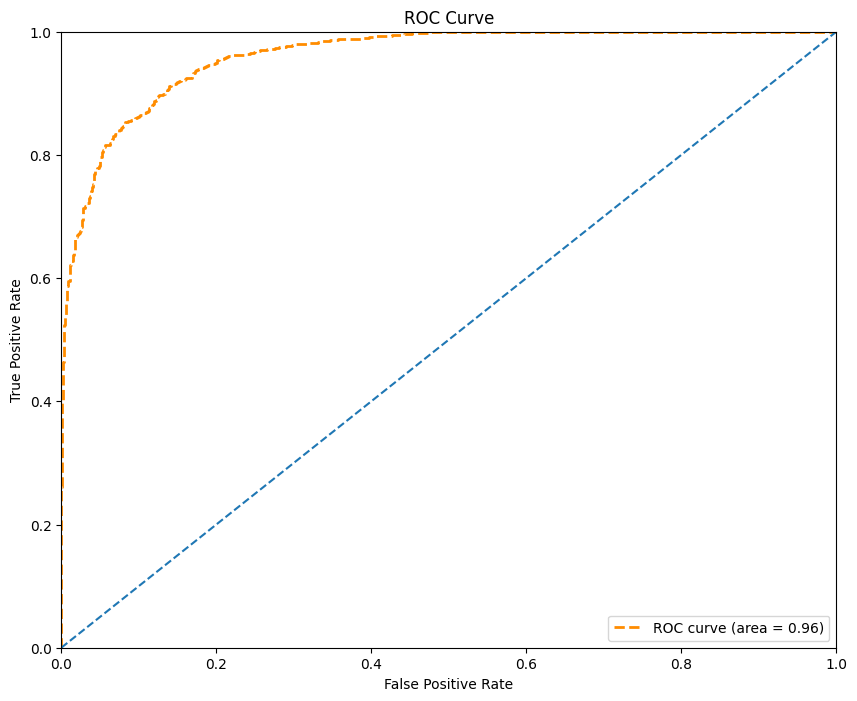

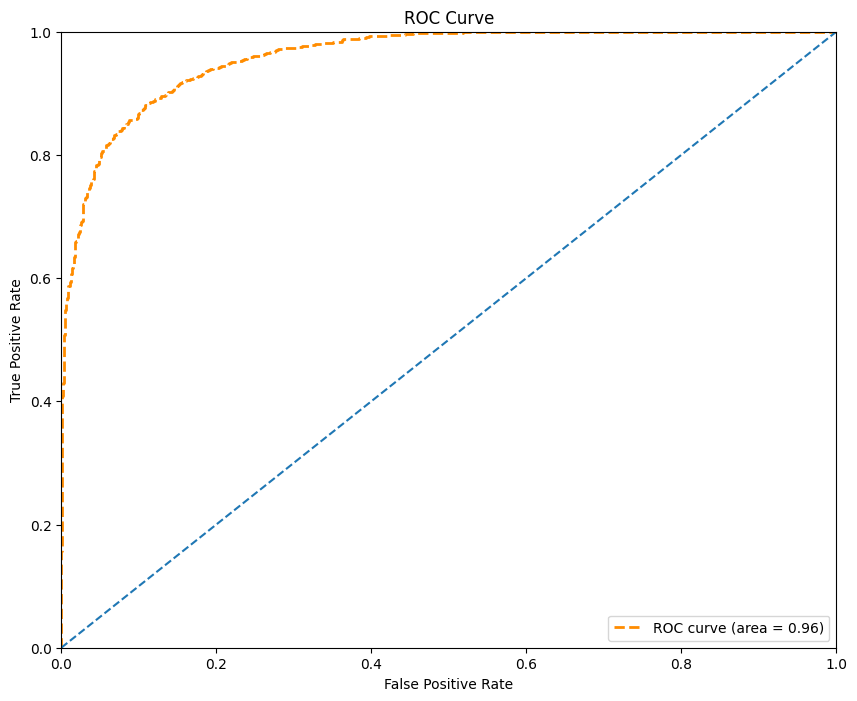

In [ ]:
GBC_model = GradientBoostingClassifier

GBC_params = {
    'max_depth':[5,10,15],
    'criterion': ['friedman_mse']
}

Rst_GBC = training_GS(GBC_model, GBC_params, model_name = 'GBC', X_train = X_train, y_train = y_train, 
                      X_test = X_test, y_test = y_test, rst_path = rst_path_, print_scores = True, plot_ROC = True)


## 5. XGBoost

In [ ]:
rst_path_= 'Result_Grid/'

Fold_1


C:\Users\anh.nguyenthe\AppData\Local\Temp\ipykernel_27852\266038395.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
C:\Users\anh.nguyenthe\AppData\Local\Temp\ipykernel_27852\266038395.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


Fold_2


C:\Users\anh.nguyenthe\AppData\Local\Temp\ipykernel_27852\266038395.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
C:\Users\anh.nguyenthe\AppData\Local\Temp\ipykernel_27852\266038395.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


Fold_3


C:\Users\anh.nguyenthe\AppData\Local\Temp\ipykernel_27852\266038395.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
C:\Users\anh.nguyenthe\AppData\Local\Temp\ipykernel_27852\266038395.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


Fold_4


C:\Users\anh.nguyenthe\AppData\Local\Temp\ipykernel_27852\266038395.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
C:\Users\anh.nguyenthe\AppData\Local\Temp\ipykernel_27852\266038395.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


Fold_5


C:\Users\anh.nguyenthe\AppData\Local\Temp\ipykernel_27852\266038395.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
C:\Users\anh.nguyenthe\AppData\Local\Temp\ipykernel_27852\266038395.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


Validation: 
B_acc:  87.9 ----------- std:  1.0
Spe:  85.3 ----------- std:  1.0
Sen:  90.5 ----------- std:  1.1
Test: 
B_acc:  88.9
Spe:  86.8
Sen:  91.0


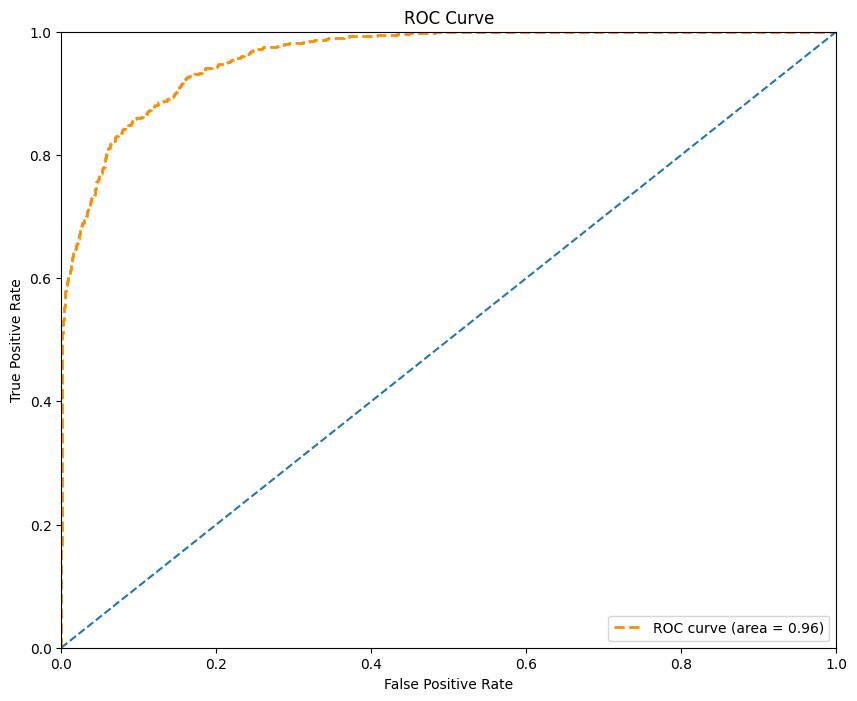

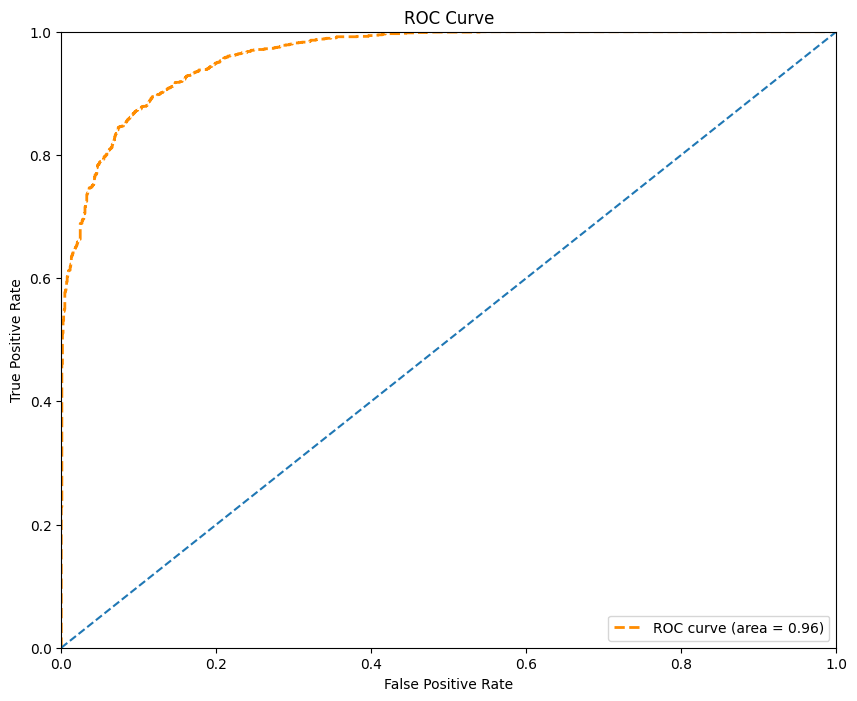

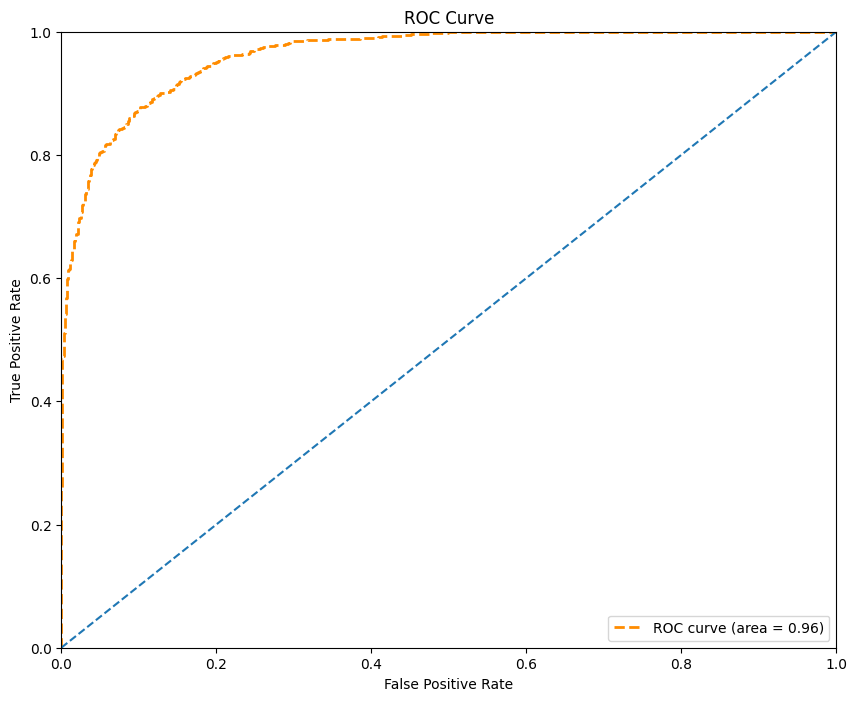

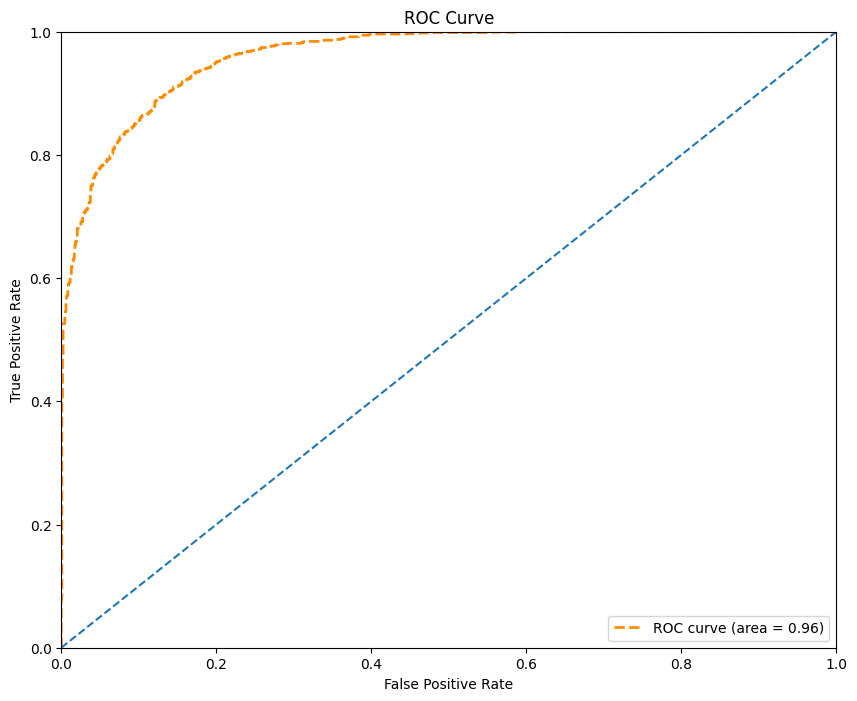

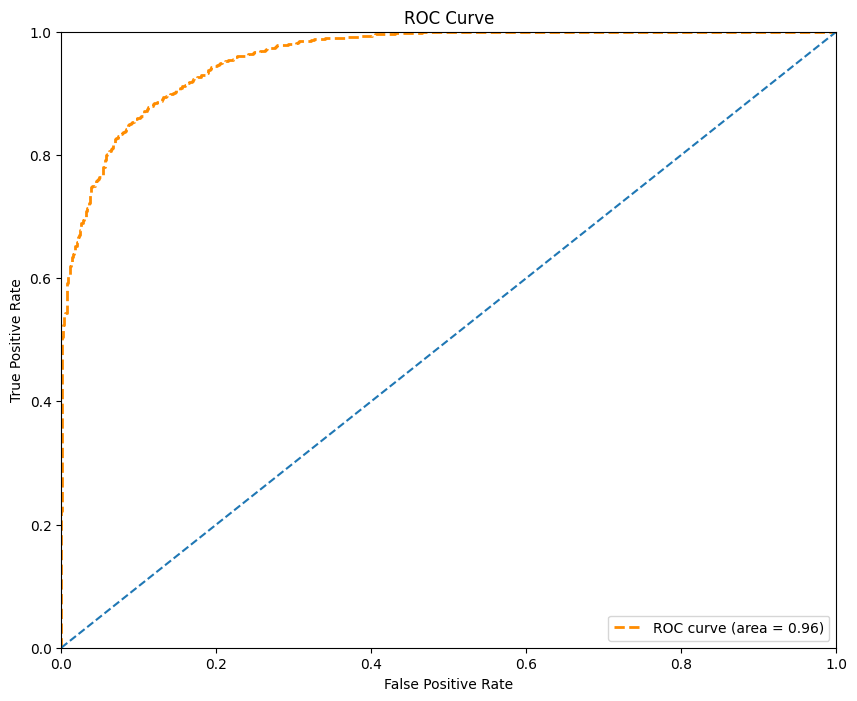

In [ ]:
XGB_model = XGBClassifier
XGB_params = {
    'max_depth': [5,10,15]
}
Rst_XGB = training_GS(XGB_model, XGB_params, model_name = 'XGB', X_train = X_train, y_train = y_train, 
                      X_test = X_test, y_test = y_test, rst_path = rst_path_, print_scores = True, plot_ROC = True)

## 6. CATBoost

In [ ]:
rst_path_= 'Result_Grid/'

Fold_1
Learning rate set to 0.025245
0:	learn: 0.6744027	total: 139ms	remaining: 2m 18s
1:	learn: 0.6603729	total: 144ms	remaining: 1m 11s
2:	learn: 0.6434550	total: 148ms	remaining: 49.1s
3:	learn: 0.6298551	total: 153ms	remaining: 38s
4:	learn: 0.6130791	total: 157ms	remaining: 31.2s
5:	learn: 0.5985372	total: 162ms	remaining: 26.8s
6:	learn: 0.5874320	total: 167ms	remaining: 23.7s
7:	learn: 0.5780821	total: 172ms	remaining: 21.3s
8:	learn: 0.5688827	total: 176ms	remaining: 19.4s
9:	learn: 0.5574073	total: 182ms	remaining: 18s
10:	learn: 0.5469330	total: 187ms	remaining: 16.8s
11:	learn: 0.5377197	total: 191ms	remaining: 15.7s
12:	learn: 0.5299385	total: 196ms	remaining: 14.8s
13:	learn: 0.5233658	total: 201ms	remaining: 14.1s
14:	learn: 0.5167252	total: 205ms	remaining: 13.5s
15:	learn: 0.5112495	total: 210ms	remaining: 12.9s
16:	learn: 0.5053185	total: 216ms	remaining: 12.5s
17:	learn: 0.4994246	total: 220ms	remaining: 12s
18:	learn: 0.4940477	total: 225ms	remaining: 11.6s
19:	lear

C:\Users\anh.nguyenthe\AppData\Local\Temp\ipykernel_27564\266038395.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
C:\Users\anh.nguyenthe\AppData\Local\Temp\ipykernel_27564\266038395.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


Fold_2
Learning rate set to 0.025245
0:	learn: 0.6734016	total: 3.43ms	remaining: 3.43s
1:	learn: 0.6587037	total: 6.78ms	remaining: 3.38s
2:	learn: 0.6423873	total: 10.5ms	remaining: 3.48s
3:	learn: 0.6271475	total: 13.6ms	remaining: 3.39s
4:	learn: 0.6145403	total: 16.7ms	remaining: 3.33s
5:	learn: 0.6002651	total: 19.5ms	remaining: 3.24s
6:	learn: 0.5883264	total: 23ms	remaining: 3.27s
7:	learn: 0.5786487	total: 26.7ms	remaining: 3.31s
8:	learn: 0.5711214	total: 30.5ms	remaining: 3.36s
9:	learn: 0.5597111	total: 33.7ms	remaining: 3.33s
10:	learn: 0.5493264	total: 37.3ms	remaining: 3.35s
11:	learn: 0.5415881	total: 40.6ms	remaining: 3.34s
12:	learn: 0.5336128	total: 43.9ms	remaining: 3.33s
13:	learn: 0.5265315	total: 47.1ms	remaining: 3.32s
14:	learn: 0.5194512	total: 50.1ms	remaining: 3.29s
15:	learn: 0.5135610	total: 53.1ms	remaining: 3.26s
16:	learn: 0.5042363	total: 56.4ms	remaining: 3.26s
17:	learn: 0.4981224	total: 59.4ms	remaining: 3.24s
18:	learn: 0.4925641	total: 62.4ms	rema

C:\Users\anh.nguyenthe\AppData\Local\Temp\ipykernel_27564\266038395.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
C:\Users\anh.nguyenthe\AppData\Local\Temp\ipykernel_27564\266038395.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


Fold_3
Learning rate set to 0.025245
0:	learn: 0.6730816	total: 3.9ms	remaining: 3.9s
1:	learn: 0.6586620	total: 7.1ms	remaining: 3.54s
2:	learn: 0.6433075	total: 10.7ms	remaining: 3.56s
3:	learn: 0.6282071	total: 14.4ms	remaining: 3.59s
4:	learn: 0.6118993	total: 18ms	remaining: 3.58s
5:	learn: 0.5985326	total: 21.2ms	remaining: 3.52s
6:	learn: 0.5871033	total: 23.8ms	remaining: 3.38s
7:	learn: 0.5761473	total: 26.9ms	remaining: 3.34s
8:	learn: 0.5644988	total: 29.8ms	remaining: 3.28s
9:	learn: 0.5533085	total: 32.8ms	remaining: 3.25s
10:	learn: 0.5435650	total: 37.7ms	remaining: 3.39s
11:	learn: 0.5366640	total: 42.3ms	remaining: 3.48s
12:	learn: 0.5287646	total: 47.1ms	remaining: 3.58s
13:	learn: 0.5206469	total: 52.1ms	remaining: 3.67s
14:	learn: 0.5109743	total: 57.1ms	remaining: 3.75s
15:	learn: 0.5054586	total: 61.1ms	remaining: 3.75s
16:	learn: 0.4997561	total: 65.1ms	remaining: 3.76s
17:	learn: 0.4954568	total: 69ms	remaining: 3.77s
18:	learn: 0.4925825	total: 73.1ms	remaining

C:\Users\anh.nguyenthe\AppData\Local\Temp\ipykernel_27564\266038395.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
C:\Users\anh.nguyenthe\AppData\Local\Temp\ipykernel_27564\266038395.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


Fold_4
Learning rate set to 0.025245
0:	learn: 0.6708154	total: 3.86ms	remaining: 3.85s
1:	learn: 0.6548752	total: 7.23ms	remaining: 3.61s
2:	learn: 0.6389872	total: 11ms	remaining: 3.65s
3:	learn: 0.6241493	total: 14.1ms	remaining: 3.51s
4:	learn: 0.6103081	total: 17.9ms	remaining: 3.57s
5:	learn: 0.5956101	total: 21.3ms	remaining: 3.53s
6:	learn: 0.5842415	total: 24.6ms	remaining: 3.49s
7:	learn: 0.5746293	total: 27.8ms	remaining: 3.44s
8:	learn: 0.5627673	total: 31.2ms	remaining: 3.43s
9:	learn: 0.5531689	total: 34.7ms	remaining: 3.43s
10:	learn: 0.5436135	total: 38.2ms	remaining: 3.44s
11:	learn: 0.5367872	total: 42.3ms	remaining: 3.48s
12:	learn: 0.5284188	total: 45.5ms	remaining: 3.46s
13:	learn: 0.5203256	total: 50.2ms	remaining: 3.54s
14:	learn: 0.5123370	total: 54.1ms	remaining: 3.55s
15:	learn: 0.5062555	total: 57.7ms	remaining: 3.55s
16:	learn: 0.4997022	total: 61.2ms	remaining: 3.54s
17:	learn: 0.4931177	total: 65.2ms	remaining: 3.56s
18:	learn: 0.4881928	total: 68.5ms	rema

C:\Users\anh.nguyenthe\AppData\Local\Temp\ipykernel_27564\266038395.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
C:\Users\anh.nguyenthe\AppData\Local\Temp\ipykernel_27564\266038395.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


Fold_5
Learning rate set to 0.025248
0:	learn: 0.6717303	total: 3.77ms	remaining: 3.77s
1:	learn: 0.6525661	total: 7.51ms	remaining: 3.75s
2:	learn: 0.6371289	total: 11.2ms	remaining: 3.72s
3:	learn: 0.6223848	total: 14.4ms	remaining: 3.58s
4:	learn: 0.6062452	total: 17.6ms	remaining: 3.5s
5:	learn: 0.5932599	total: 21ms	remaining: 3.48s
6:	learn: 0.5822312	total: 24.3ms	remaining: 3.44s
7:	learn: 0.5704355	total: 28.2ms	remaining: 3.5s
8:	learn: 0.5594175	total: 31.9ms	remaining: 3.51s
9:	learn: 0.5489012	total: 35.1ms	remaining: 3.48s
10:	learn: 0.5399186	total: 38.7ms	remaining: 3.48s
11:	learn: 0.5331712	total: 41.9ms	remaining: 3.45s
12:	learn: 0.5265767	total: 44.7ms	remaining: 3.4s
13:	learn: 0.5190968	total: 47.6ms	remaining: 3.35s
14:	learn: 0.5122550	total: 50.7ms	remaining: 3.33s
15:	learn: 0.5052860	total: 53.9ms	remaining: 3.31s
16:	learn: 0.4997669	total: 56.7ms	remaining: 3.28s
17:	learn: 0.4955042	total: 59.8ms	remaining: 3.26s
18:	learn: 0.4906805	total: 62.8ms	remaini

C:\Users\anh.nguyenthe\AppData\Local\Temp\ipykernel_27564\266038395.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
C:\Users\anh.nguyenthe\AppData\Local\Temp\ipykernel_27564\266038395.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


Validation: 
B_acc:  88.2 ----------- std:  0.9
Spe:  85.6 ----------- std:  1.2
Sen:  90.7 ----------- std:  0.8
Test: 
B_acc:  89.0
Spe:  87.2
Sen:  90.9


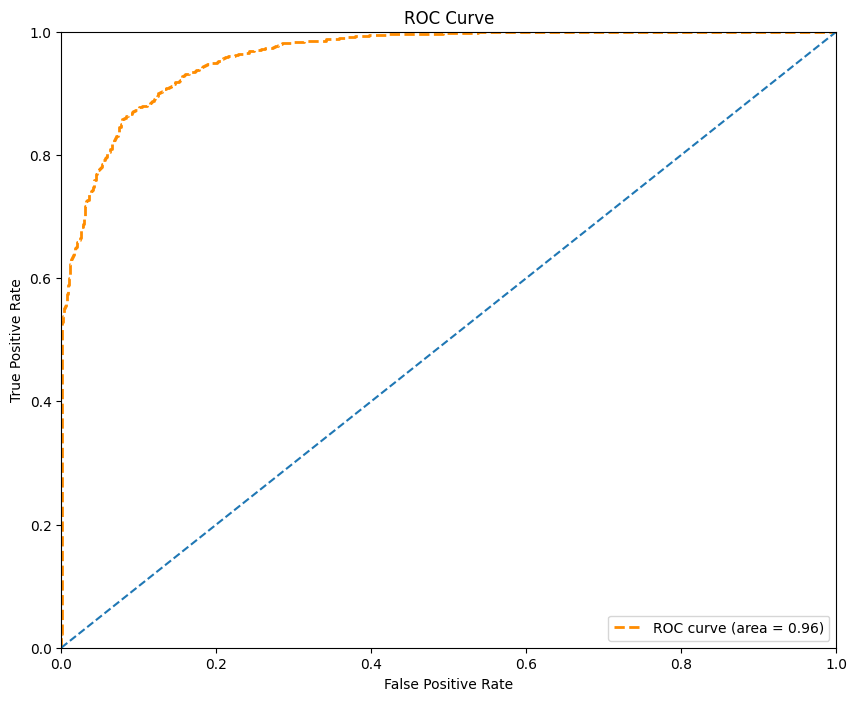

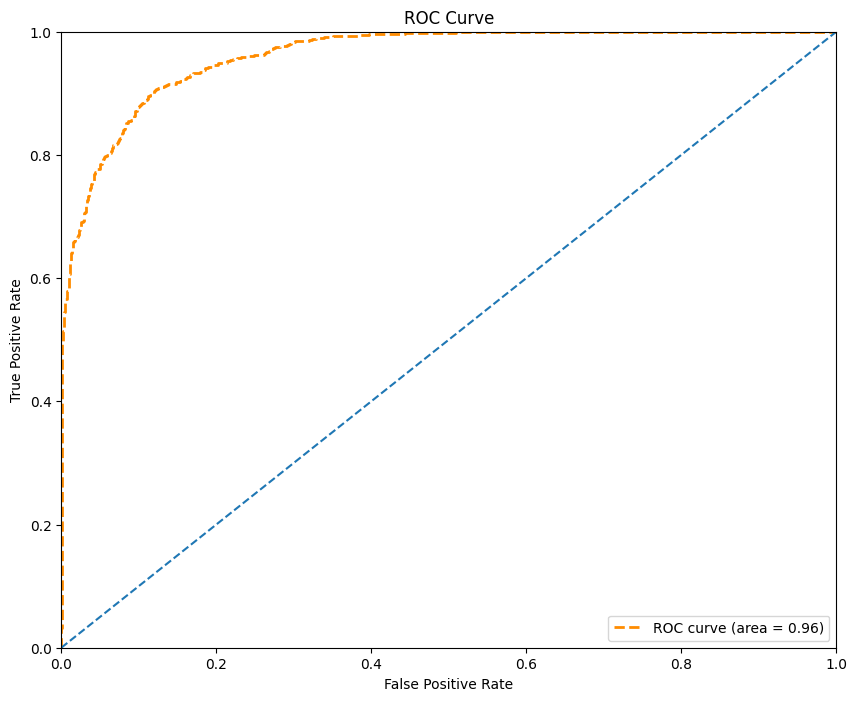

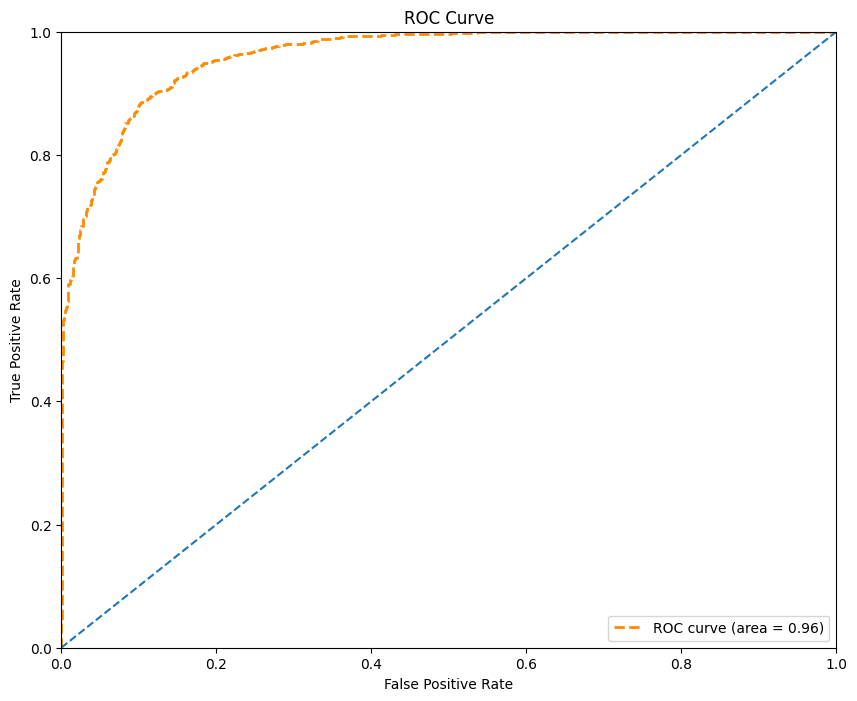

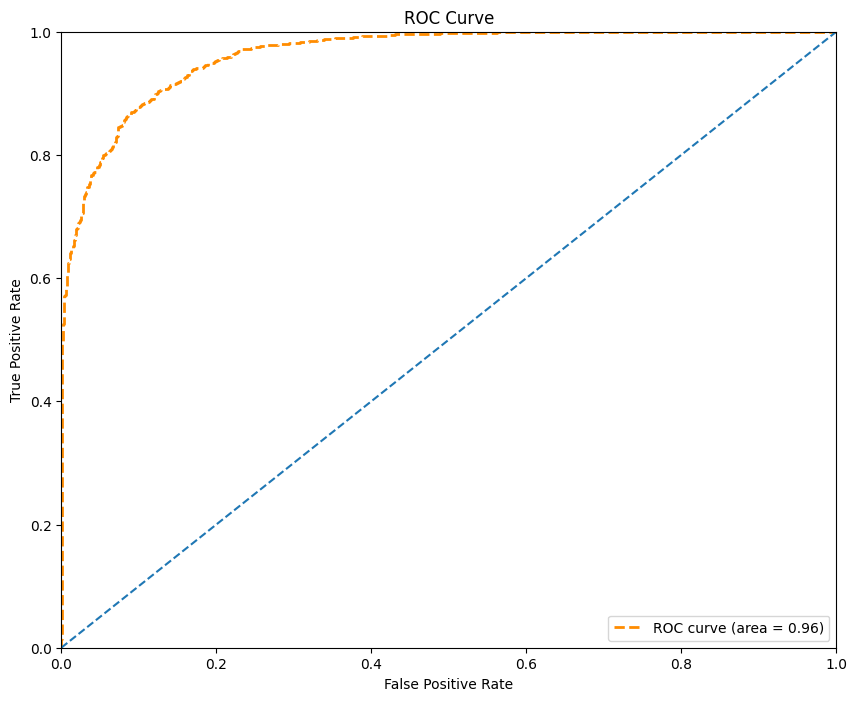

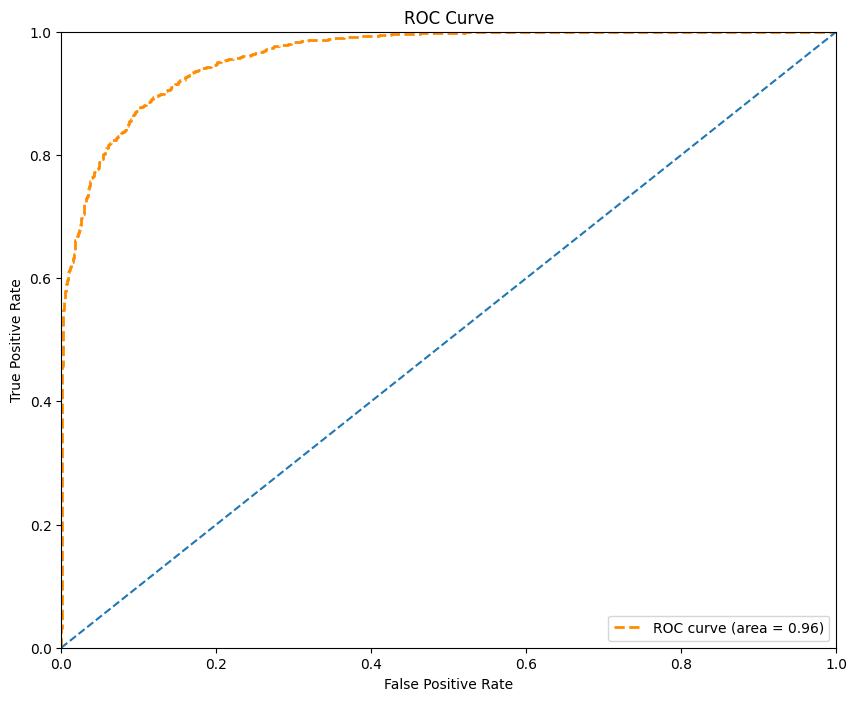

In [ ]:
CAT_model = CatBoostClassifier
CAT_params = {
    'depth': [5,10,15],
}

Rst_CAT = training_GS(CAT_model, CAT_params, model_name = 'CAT', X_train = X_train, y_train = y_train, 
                      X_test = X_test, y_test = y_test, rst_path = rst_path_, print_scores = True, plot_ROC = True)